# Installing libraries

# Installing ChEMBL web service package to import the bioactivity data from the ChEMBL Database.

In [1]:
! pip install chembl_webresource_client


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing Necessary Libraries

In [97]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Search for Target protein

# Target search for Acetylcholinesterase target protein

In [3]:
target = new_client.target
target_query = target.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
1,[],Homo sapiens,Acetylcholinesterase,16.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Torpedo californica,Acetylcholinesterase,16.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
3,[],Mus musculus,Acetylcholinesterase,16.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
4,[],Rattus norvegicus,Acetylcholinesterase,16.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
5,[],Electrophorus electricus,Acetylcholinesterase,16.0,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
6,[],Bos taurus,Acetylcholinesterase,16.0,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913
7,[],Bemisia tabaci,AChE2,16.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
8,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.0,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539
9,[],Nephotettix cincticeps,Ace-orthologous acetylcholinesterase,16.0,False,CHEMBL2366514,"[{'accession': 'Q9NJH6', 'component_descriptio...",SINGLE PROTEIN,94400


# Select and retrieve bioactivity data for "Acetylcholinesterase" protein

# We are going to assign the fifth entry (which is "target_chembl_id" associates to the target protein which is Acetylcholinesterase)

In [4]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL2242744'

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(res)

In [7]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,12438748,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,1.83
1,None,None,12438749,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,112.72
2,None,None,12438750,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,37.5
3,None,None,12438751,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,4.5
4,None,None,12438752,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,1.84
5,None,None,12438753,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,3.81
6,None,None,12438754,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,12.34
7,None,None,12438755,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,9.92
8,None,None,12438756,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,8.29
9,None,None,12438757,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,1.76


# We are going to save the bioactivity data into a CSV file bioactivity_data.csv.

In [8]:
df.to_csv('acetylcholinesterase_01_bioactivity_data_raw.csv', index=False)

# Handling missing values

In [9]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,12438748,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,1.83
1,None,None,12438749,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,112.72
2,None,None,12438750,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,37.5
3,None,None,12438751,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,4.5
4,None,None,12438752,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,1.84
5,None,None,12438753,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,3.81
6,None,None,12438754,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,12.34
7,None,None,12438755,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,9.92
8,None,None,12438756,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,8.29
9,None,None,12438757,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,1.76


# Length of the data specifically for unique values of canonical_smiles

In [10]:
len(df2.canonical_smiles.unique())

18

# We are going to drop the duplicates which is canonical_smiles.

In [11]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,12438748,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,1.83
1,None,None,12438749,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,112.72
2,None,None,12438750,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,37.5
3,None,None,12438751,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,4.5
4,None,None,12438752,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,1.84
5,None,None,12438753,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,3.81
6,None,None,12438754,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,12.34
7,None,None,12438755,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,9.92
8,None,None,12438756,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,8.29
9,None,None,12438757,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,1.76


# Data pre-processing of the bioactivity data

# Combining the 3 columns which are molecule_chembl_id,canonical_smiles,standard_value and bioactivity_class into a one dataframe 

In [12]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL463210,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,1830.0
1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,112720.0
2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,37500.0
3,CHEMBL2252721,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O,4500.0
4,CHEMBL2252851,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O,1840.0
5,CHEMBL2252850,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O,3810.0
6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,12340.0
7,CHEMBL2252848,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O,9920.0
8,CHEMBL2252847,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O,8290.0
9,CHEMBL2252846,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC,1760.0


Saves dataframe to CSV file

In [13]:
df3.to_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv', index=False)

# Representing the compounds as active, inactive or intermediate

In [14]:
df4 = pd.read_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [15]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [16]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL463210,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,1830.0,intermediate
1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,112720.0,inactive
2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,37500.0,inactive
3,CHEMBL2252721,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O,4500.0,intermediate
4,CHEMBL2252851,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O,1840.0,intermediate
5,CHEMBL2252850,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O,3810.0,intermediate
6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,12340.0,inactive
7,CHEMBL2252848,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O,9920.0,intermediate
8,CHEMBL2252847,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O,8290.0,intermediate
9,CHEMBL2252846,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC,1760.0,intermediate


Saves dataframe to CSV file

In [17]:
df5.to_csv('acetylcholinesterase_03_bioactivity_data_curated.csv', index=False)

# Here we have used '! zip acetylcholinesterase.zip *.csv' to download multiple files in an easy way and also saves storage space which is useful for packaging data like assay results or bioactivity datasets

In [18]:
! zip acetylcholinesterase.zip *.csv

  adding: acetylcholinesterase_01_bioactivity_data_raw.csv (deflated 85%)
  adding: acetylcholinesterase_02_bioactivity_data_preprocessed.csv (deflated 75%)
  adding: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 76%)
  adding: acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 76%)
  adding: acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv (deflated 76%)
  adding: acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv (deflated 96%)
  adding: acetylcholinesterase_07_bioactivity_data_2class_pIC50_pubchem_fp.csv (deflated 96%)


# 'ls -1' is used to list files in the current directory in a detailed format 

In [19]:
! ls -l

total 17861
-rwx------+ 1 saich saich  127768 May  2 09:42 CDD_ML_Part_1_Acetylcholinesterase_Bioactivity_Data_Concised.ipynb
-rwx------+ 1 saich saich  316592 May  2 09:42 CDD_ML_Part_2_Acetylcholinesterase_Exploratory_Data_Analysis.ipynb
-rwx------+ 1 saich saich  213374 May  2 09:42 CDD_ML_Part_3_Acetylcholinesterase_Descriptor_Dataset_Preparation.ipynb
-rwx------+ 1 saich saich  101693 May  2 09:42 CDD_ML_Part_4_Acetylcholinesterase_Regression_Random_Forest.ipynb
-rwx------+ 1 saich saich  231916 May  2 09:42 CDD_ML_Part_5_Acetylcholinesterase_Compare_Regressors.ipynb
-rwx------+ 1 saich saich  516475 May  2 02:25 Drug_Discovery_ML_1.ipynb
drwx------+ 1 saich saich       0 Apr  4 02:58 PaDEL-Descriptor
-rwx------+ 1 saich saich      29 May  2 09:42 README.md
-rw----r--+ 1 saich saich  874361 May  2 09:45 acetylcholinesterase.zip
-rwx------+ 1 saich saich    9847 May  2 09:45 acetylcholinesterase_01_bioactivity_data_raw.csv
-rwx------+ 1 saich saich    1112 May  2 09:45 acetylcholin

---

# Installing conda and rdkit. Here Conda is an open-source package management and environment management system. And RDKit is an open-source cheminformatics toolkit used for working with chemical informatics and molecular modeling data.

In [20]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('C:/Users/saich/miniconda3/Lib/site-packages')

--2025-05-02 09:46:03--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 2606:4700::6810:bf9e, 2606:4700::6810:20f1, 104.16.191.158, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|2606:4700::6810:bf9e|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: 'Miniconda3-py37_4.8.2-Linux-x86_64.sh'

     0K .......... .......... .......... .......... ..........  0% 2.88M 28s
    50K .......... .......... .......... .......... ..........  0% 1.16M 49s
   100K .......... .......... .......... .......... ..........  0% 15.4M 34s
   150K .......... .......... .......... .......... ..........  0% 3.22M 32s
   200K .......... .......... .......... .......... ..........  0% 2.46M 32s
   250K .......... .......... .......... .......... ..........  0% 9.45M 28s
   300K .......... .......... .......... .......... ..........  0%  290M 24s
   350K ......

PREFIX=/usr/local
Unpacking payload ...


./Miniconda3-py37_4.8.2-Linux-x86_64.sh: line 392: /usr/local/conda.exe: Permission denied
chmod: cannot access '/usr/local/conda.exe': No such file or directory
./Miniconda3-py37_4.8.2-Linux-x86_64.sh: line 404: /usr/local/conda.exe: No such file or directory
./Miniconda3-py37_4.8.2-Linux-x86_64.sh: line 406: /usr/local/conda.exe: No such file or directory


Channels:
 - rdkit
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



# Loading the bioactivity data.

In [21]:
! wget https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_03_bioactivity_data_curated.csv

--2025-05-02 09:55:03--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_03_bioactivity_data_curated.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 385924 (377K) [text/plain]
Saving to: 'acetylcholinesterase_03_bioactivity_data_curated.csv.1'

     0K .......... .......... .......... .......... .......... 13%  952K 0s
    50K .......... .......... .......... .......... .......... 26% 1.23M 0s
   100K .......... .......... .......... .......... .......... 39% 6.68M 0s
   150K .......... .......... .......... .......... .......... 53% 4.24M 0s
   200K .......... .......... .......... .......... .......... 66% 1.52M 0s
   250K .......... .......... .......... .......... .......... 79% 35.1M 0s
   300K ......

In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('acetylcholinesterase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL463210,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,1830.0,intermediate
1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,112720.0,inactive
2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,37500.0,inactive
3,CHEMBL2252721,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O,4500.0,intermediate
4,CHEMBL2252851,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O,1840.0,intermediate
5,CHEMBL2252850,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O,3810.0,intermediate
6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,12340.0,inactive
7,CHEMBL2252848,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O,9920.0,intermediate
8,CHEMBL2252847,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O,8290.0,intermediate
9,CHEMBL2252846,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC,1760.0,intermediate


In [24]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [25]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [26]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL463210,1830.0,intermediate,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl
1,CHEMBL2252723,112720.0,inactive,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O
2,CHEMBL2252722,37500.0,inactive,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O
3,CHEMBL2252721,4500.0,intermediate,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O
4,CHEMBL2252851,1840.0,intermediate,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O
5,CHEMBL2252850,3810.0,intermediate,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O
6,CHEMBL2252849,12340.0,inactive,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O
7,CHEMBL2252848,9920.0,intermediate,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O
8,CHEMBL2252847,8290.0,intermediate,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O
9,CHEMBL2252846,1760.0,intermediate,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC


# Calculating Lipsinki Molecular Descriptors

In [27]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [28]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [29]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,350.591,4.7181,0.0,5.0
1,455.557,6.3177,0.0,6.0
2,441.530,5.9276,0.0,6.0
3,427.503,5.5375,0.0,6.0
4,413.476,5.1474,0.0,6.0
5,399.449,4.7573,0.0,6.0
6,385.422,4.3672,0.0,6.0
7,371.395,3.9771,0.0,6.0
8,357.368,3.5870,0.0,6.0
9,478.594,7.9358,0.0,8.0


# Combining The DataFrames 

In [30]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,350.591,4.7181,0.0,5.0
1,455.557,6.3177,0.0,6.0
2,441.530,5.9276,0.0,6.0
3,427.503,5.5375,0.0,6.0
4,413.476,5.1474,0.0,6.0
5,399.449,4.7573,0.0,6.0
6,385.422,4.3672,0.0,6.0
7,371.395,3.9771,0.0,6.0
8,357.368,3.5870,0.0,6.0
9,478.594,7.9358,0.0,8.0


In [31]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL463210,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,1830.0,intermediate
1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,112720.0,inactive
2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,37500.0,inactive
3,CHEMBL2252721,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O,4500.0,intermediate
4,CHEMBL2252851,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O,1840.0,intermediate
5,CHEMBL2252850,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O,3810.0,intermediate
6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,12340.0,inactive
7,CHEMBL2252848,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O,9920.0,intermediate
8,CHEMBL2252847,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O,8290.0,intermediate
9,CHEMBL2252846,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC,1760.0,intermediate


In [32]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL463210,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,1830.0,intermediate,350.591,4.7181,0.0,5.0
1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,112720.0,inactive,455.557,6.3177,0.0,6.0
2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,37500.0,inactive,441.530,5.9276,0.0,6.0
3,CHEMBL2252721,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O,4500.0,intermediate,427.503,5.5375,0.0,6.0
4,CHEMBL2252851,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O,1840.0,intermediate,413.476,5.1474,0.0,6.0
5,CHEMBL2252850,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O,3810.0,intermediate,399.449,4.7573,0.0,6.0
6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,12340.0,inactive,385.422,4.3672,0.0,6.0
7,CHEMBL2252848,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O,9920.0,intermediate,371.395,3.9771,0.0,6.0
8,CHEMBL2252847,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O,8290.0,intermediate,357.368,3.5870,0.0,6.0
9,CHEMBL2252846,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC,1760.0,intermediate,478.594,7.9358,0.0,8.0


# We are going to IC50 data into negative logarithmic scale which is -log10(IC50). IC50 to pIC50

In [33]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

# Statistical Analysis

In [34]:
df_combined.standard_value.describe()

count    1.800000e+01
mean     2.235217e+06
std      9.424884e+06
min      8.700000e+02
25%      1.832500e+03
50%      6.455000e+03
75%      1.180500e+04
max      4.000000e+07
Name: standard_value, dtype: float64

In [35]:
-np.log10( (10**-9)* 100000000 )

1.0

In [36]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [37]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

        
    return x

In [38]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL463210,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,intermediate,350.591,4.7181,0.0,5.0,1830.0
1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,455.557,6.3177,0.0,6.0,112720.0
2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,441.530,5.9276,0.0,6.0,37500.0
3,CHEMBL2252721,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,427.503,5.5375,0.0,6.0,4500.0
4,CHEMBL2252851,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,413.476,5.1474,0.0,6.0,1840.0
5,CHEMBL2252850,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,399.449,4.7573,0.0,6.0,3810.0
6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,inactive,385.422,4.3672,0.0,6.0,12340.0
7,CHEMBL2252848,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O,intermediate,371.395,3.9771,0.0,6.0,9920.0
8,CHEMBL2252847,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O,intermediate,357.368,3.5870,0.0,6.0,8290.0
9,CHEMBL2252846,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC,intermediate,478.594,7.9358,0.0,8.0,1760.0


In [39]:
df_norm.standard_value_norm.describe()

count    1.800000e+01
mean     2.235217e+06
std      9.424884e+06
min      8.700000e+02
25%      1.832500e+03
50%      6.455000e+03
75%      1.180500e+04
max      4.000000e+07
Name: standard_value_norm, dtype: float64

In [40]:
def pIC50(input):
    pIC50 = []
    
    for molar in input['standard_value_norm']:
        pIC50.append(-np.log10(molar))
    
    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
    
    return x

df_final = pIC50(df_norm)
df_final


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL463210,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,intermediate,350.591,4.7181,0.0,5.0,-3.262451
1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,455.557,6.3177,0.0,6.0,-5.052001
2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,441.530,5.9276,0.0,6.0,-4.574031
3,CHEMBL2252721,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,427.503,5.5375,0.0,6.0,-3.653213
4,CHEMBL2252851,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,413.476,5.1474,0.0,6.0,-3.264818
5,CHEMBL2252850,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,399.449,4.7573,0.0,6.0,-3.580925
6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,inactive,385.422,4.3672,0.0,6.0,-4.091315
7,CHEMBL2252848,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O,intermediate,371.395,3.9771,0.0,6.0,-3.996512
8,CHEMBL2252847,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O,intermediate,357.368,3.5870,0.0,6.0,-3.918555
9,CHEMBL2252846,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC,intermediate,478.594,7.9358,0.0,8.0,-3.245513


In [41]:
df_final.pIC50.describe()

count    18.000000
mean     -3.957929
std       1.054814
min      -7.602060
25%      -4.070636
50%      -3.795859
75%      -3.263043
max      -2.939519
Name: pIC50, dtype: float64

In [42]:
df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

# Here we are removing the intermediate class from the data.

In [43]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,455.557,6.3177,0.0,6.0,-5.052001
2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,441.530,5.9276,0.0,6.0,-4.574031
6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,inactive,385.422,4.3672,0.0,6.0,-4.091315
12,CHEMBL2252843,CCOP(=O)(OCC)SCCCCCCCSP(=O)(OCC)OCC,inactive,436.513,6.7655,0.0,8.0,-4.008600
13,CHEMBL2252842,CCOP(=O)(OCC)SCCCCCCSP(=O)(OCC)OCC,active,422.486,6.3754,0.0,8.0,-2.939519
14,CHEMBL2252841,CCOP(=O)(OCC)SCCCCCSP(=O)(OCC)OCC,inactive,408.459,5.9853,0.0,8.0,-4.091315
17,CHEMBL1232328,CCOP(O)(=S)OCC,inactive,170.170,1.2762,1.0,3.0,-7.602060


# Converting into CSV file

In [44]:
df_2class.to_csv('acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv')

# Now Exploratory Data Analysis.

# Importing the Libraries

In [45]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

# Count plot with two classes( active and inactive) as x axis and frequencey as y axis

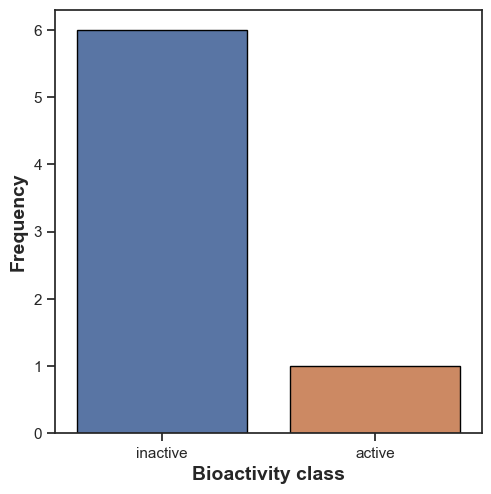

In [46]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

# Scatter plot between Molecular weight and LogP

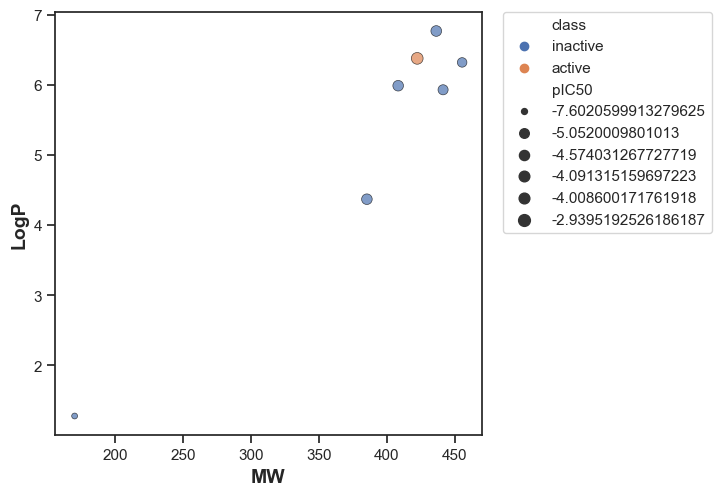

In [47]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

# Box plots for pIC50 and bioactivity classes.

In [48]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu


  seed(1)


  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]


  stat, p = mannwhitneyu(active, inactive)



  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [49]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,6.0,0.207196,0.05,Same distribution (fail to reject H0)


# Now Molecular Weights and Bioactivity classes Box plot

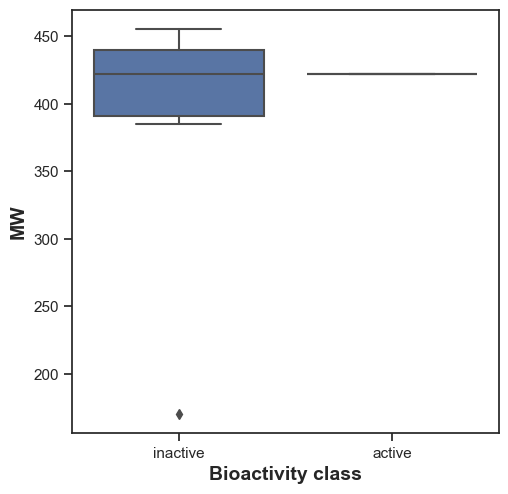

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [51]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3.0,1.0,0.05,Same distribution (fail to reject H0)


# LogP and Bioactivity classes Box plot¶

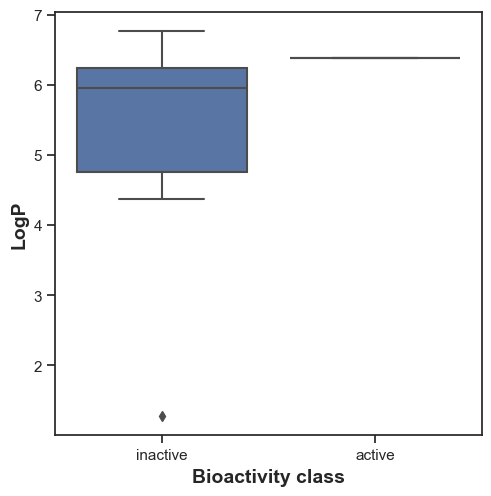

In [52]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [53]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,5.0,0.571429,0.05,Same distribution (fail to reject H0)


# Number of H bond Donors and Bioactivity classes Box plots

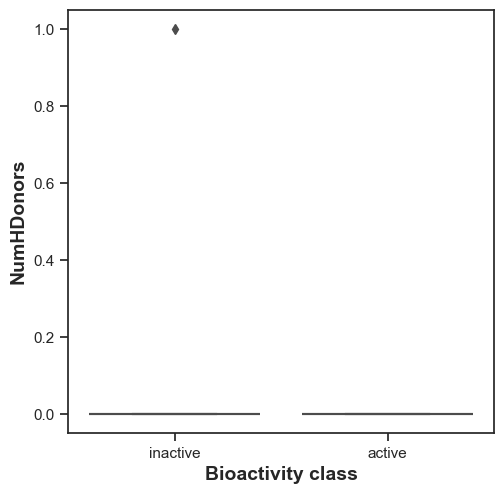

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [55]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2.5,1.0,0.05,Same distribution (fail to reject H0)


# Number of H bond acceptors and Bioactivity classes Box plots¶

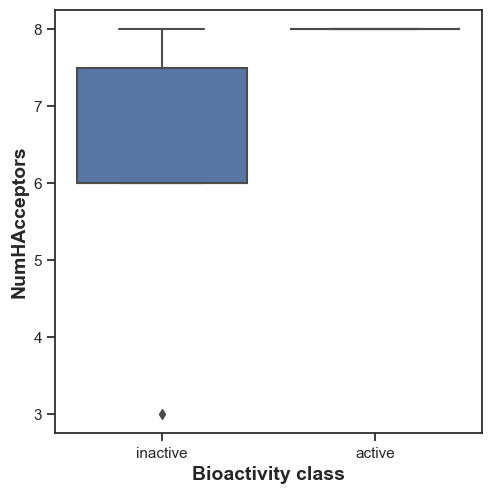

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [57]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,5.0,0.417887,0.05,Same distribution (fail to reject H0)


# Zip Files

In [58]:
! zip -r results.zip . -i *.csv *.pdf

  adding: acetylcholinesterase_01_bioactivity_data_raw.csv (deflated 85%)
  adding: acetylcholinesterase_02_bioactivity_data_preprocessed.csv (deflated 75%)
  adding: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 76%)
  adding: acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 68%)
  adding: acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv (deflated 60%)
  adding: acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv (deflated 96%)
  adding: acetylcholinesterase_07_bioactivity_data_2class_pIC50_pubchem_fp.csv (deflated 96%)
  adding: mannwhitneyu_LogP.csv (deflated 11%)
  adding: mannwhitneyu_MW.csv (deflated 5%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 9%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 7%)
  adding: mannwhitneyu_pIC50.csv (deflated 9%)
  adding: plot_bioactivity_class.pdf (deflated 40%)
  adding: plot_LogP.pdf (deflated 39%)
  adding: plot_MW.pdf (deflated 41%)
  adding: plot_MW_vs_LogP.pdf (deflate

# Loading the dataset for building the models, evaluating the models and comparing the models.

In [89]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2025-05-02 17:32:12--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2025-05-02 17:32:13--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: 'acetylcholinesterase_06_bioactivity_data_3clas

In [91]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.12
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.00
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.52
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.61
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.60
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.42
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.46


# Separating the pIC50 values from the dataset

In [92]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [93]:
Y = df.pIC50
Y

0      6.12
1      7.00
2      4.30
3      6.52
4      6.10
       ... 
4690   5.61
4691   5.60
4692   5.42
4693   5.46
4694   5.56
Name: pIC50, Length: 4695, dtype: float64

# Removing Low Variance Features

In [94]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

# Splitting the data into train-test with a ration of 80/20 ratio

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Building Different Models and evaluating them

# Random Forest Regressor

In [98]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.537798781062554

# Support Vector Machine

In [99]:
from sklearn.svm import SVR
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2


0.44362962150303487

# Linear Regression

In [100]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2


0.2800848978966881

# XGBoost Regressor

In [102]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2


0.539904880336378

# K-Nearest Neighbor

In [103]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2


0.49244780678522815

In [104]:
Y_pred = model.predict(X_test)

# Scatter Plot of Experimental vs Predicted pIC50 Values

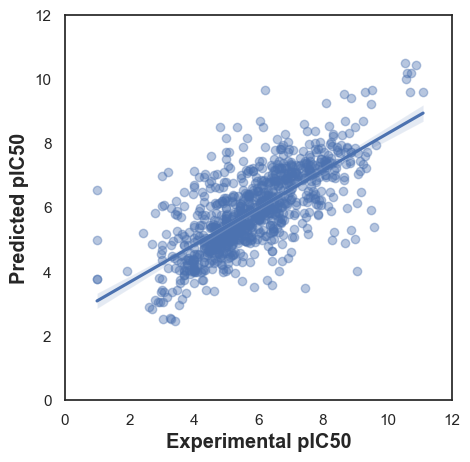

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()  


# Comparision of Different Models

# Importing Necessary libraries

In [106]:
! pip install lazypredict


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [107]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

# Comparing Machine Learning Algorithms

In [ ]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [01:48<00:01,  1.60s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.819316


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [01:50<00:00,  2.63s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 88%|████████████████████████████████████████████████████████████████████████▏         | 37/42 [01:31<00:08,  1.78s/it]